In [5]:
import numpy as np
import keras

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [7]:
import warnings

warnings.filterwarnings('ignore')

## Create the Convolutional Neural Network

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))


In [10]:
model.add(MaxPooling2D(pool_size=2))

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))


In [12]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [13]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



#### Add a flatten layer

In [14]:
model.add(Flatten())

### Summary of the CNN

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          9

# Image Augmentation

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [56]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen

### Set the Directory

#### "YOUR FILE PATH" is the local path of your machine where you have set up your folders for training and test sets.

In [55]:
train_set = train_datagen.flow_from_directory (
    'C:\\Users\\sowndariya\\Desktop\\dl\\DL Paper 1\\Dataset\\CNN\\Brand Classification\\train',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='categorical')
train_set

Found 23 images belonging to 3 classes.


In [54]:
test_set = test_datagen.flow_from_directory(
    'C:\\Users\\sowndariya\\Desktop\\dl\\DL Paper 1\\Dataset\\CNN\\Brand Classification\\test',\
        target_size=(64, 64),\
        batch_size=32,\
        class_mode='categorical')
test_set

Found 0 images belonging to 0 classes.


## Fit the Model



### steps_per_epoch = Total Number of images in the training set
### validation_steps = Total number of Images in the test set

In [57]:
model.fit_generator(
        train_set,
        steps_per_epoch=2000,
        epochs=1,
        validation_data=test_set,
        validation_steps=1000)

   1/2000 [..............................] - 0s 23ms/step - loss: 0.7252 - accuracy: 0.3333


## Predicting a New Image

In [26]:
import numpy as np


In [27]:
from keras.preprocessing import image

#### Target size is 64x64 as out CNN inputs the image size as 64x64

In [58]:
new_image=image.load_img('Bata67.jpg',target_size=(64,64))

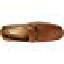

In [59]:
new_image

### Change the image to  numpy array

In [60]:
new_image=image.img_to_array(new_image)

In [61]:
new_image.ndim

3

In [62]:
type(new_image)

numpy.ndarray

### The input needs to be in 4 dimesnion. 4th Dim represents the batch size so add one more dimesion using the expand_dims function.

In [63]:
new_image=np.expand_dims(new_image,axis=0)

In [64]:
new_image.ndim

4

#### Predict the image and store it in a variable

In [65]:
result=model.predict(new_image)

In [66]:
result

array([[1.]], dtype=float32)

In [67]:
train_set.class_indices

{'bata': 0, 'clarks': 1, 'leecooper': 2}

In [68]:
result.ndim

2

In [73]:
result[0][0]

1.0

In [45]:
result=model.predict(new_image)
if result[0][0]==1:
    predict=print('This is a Dog')
else:
    predict=print('This is a Cat')
    
    


This is a Dog
